In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from IPython import display
# Import everything in the functions folder
from functions.proj1_helpers import *
from functions.clean_data import *
from functions.least_squares import *
from functions.split import *
from functions.pca import *
from functions.helpers import *

# Cleaning and Analysis #2

In the notebook `Cleaning_and_Analysis_Simple` we tried to remove columns or change the NaNs with the mean value or the median. But we saw that if we don't study the data correctly, it doesn't work that well. So, in this notebook, we will first study the data. 

## Study of the data

First, we load the training data. (We'll test our hypothesis on the test data later.

In [2]:
DATA_TRAIN_PATH = 'data/train.csv' 
_, _, _, headers = load_data(DATA_TRAIN_PATH)
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

Since we never checked what the data look like, it would be a good idea to use an histogram on all the columns to get an idea about each of the variables.

Number of variables: 30


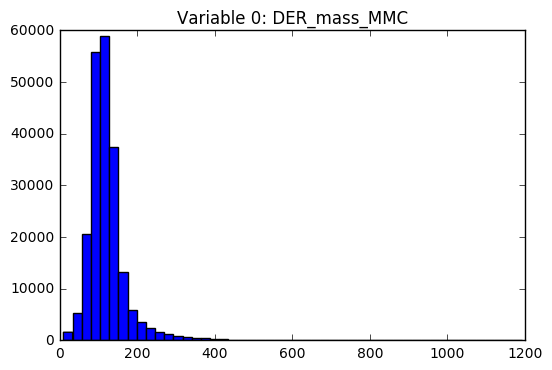

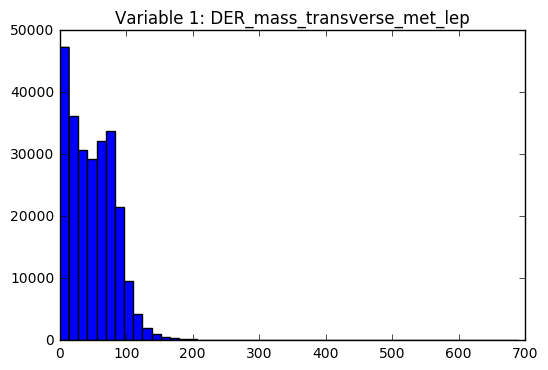

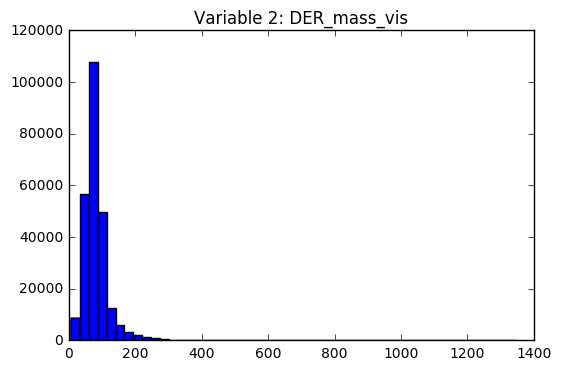

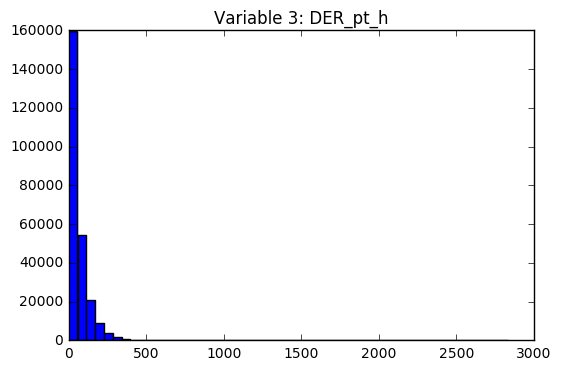

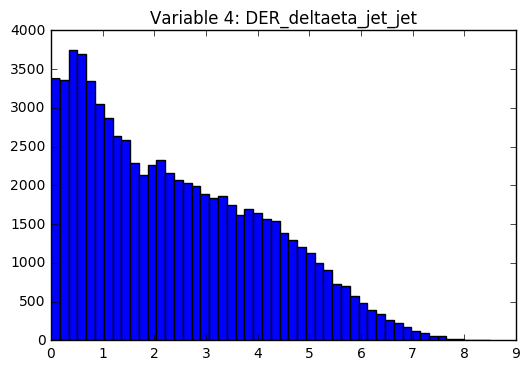

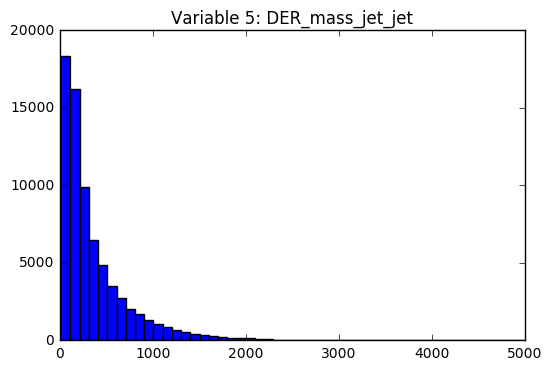

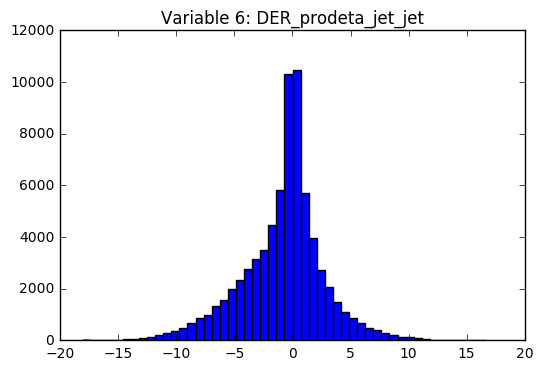

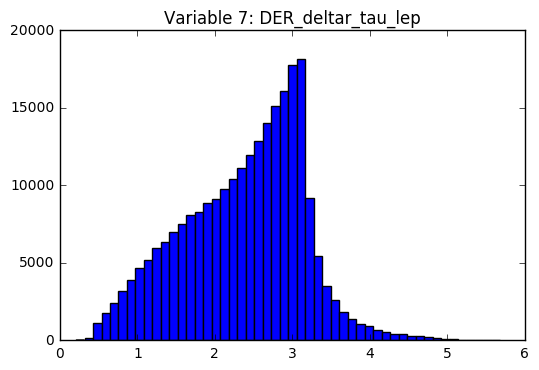

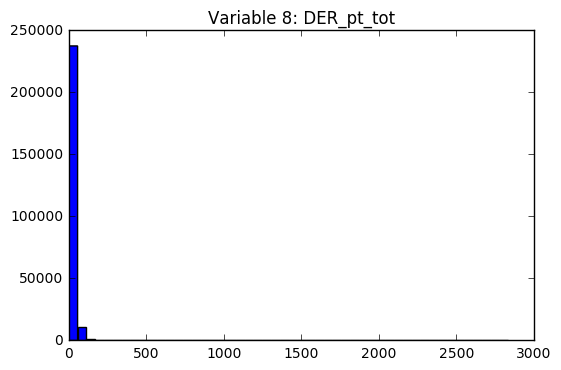

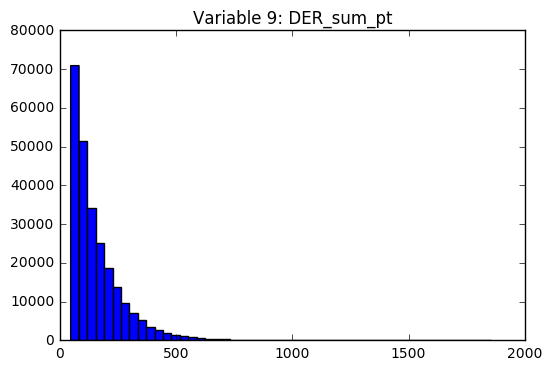

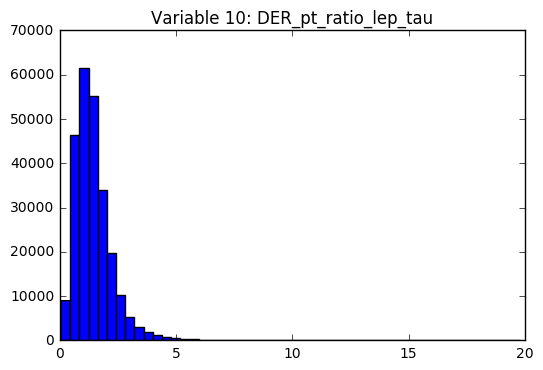

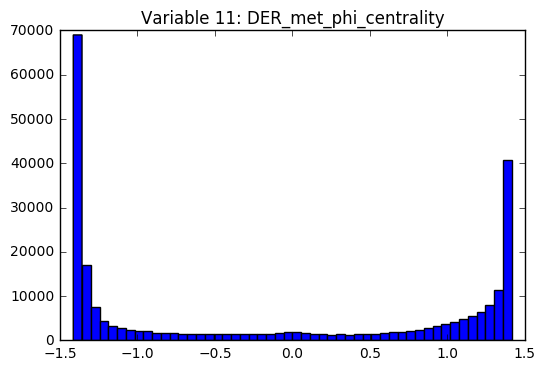

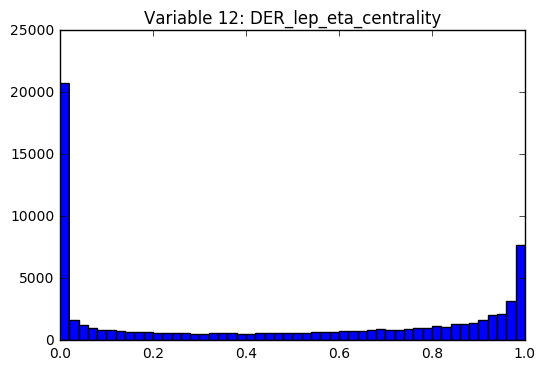

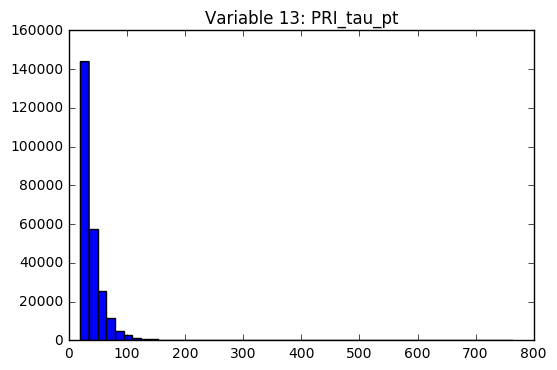

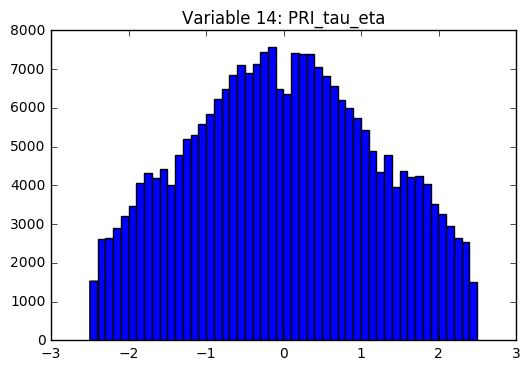

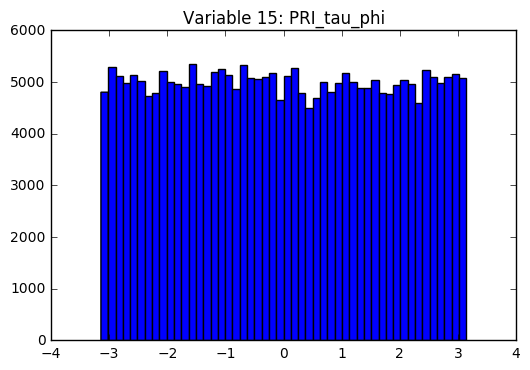

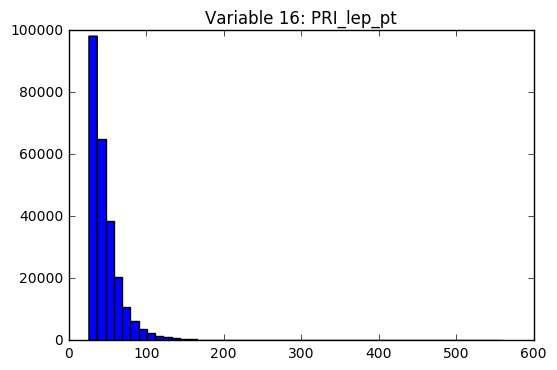

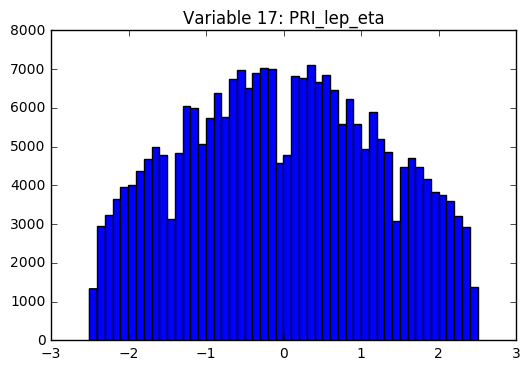

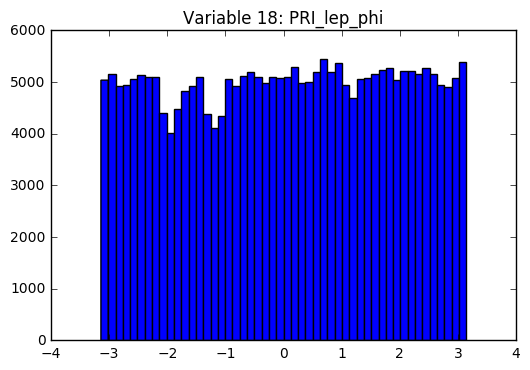

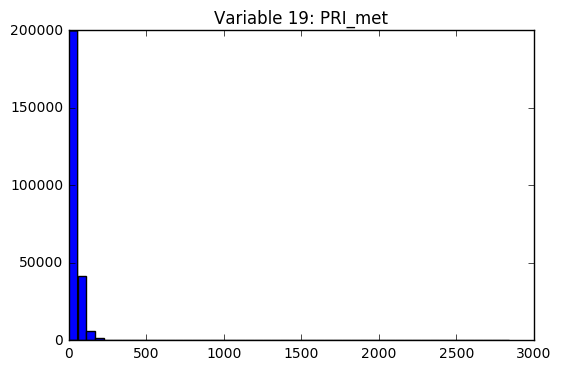

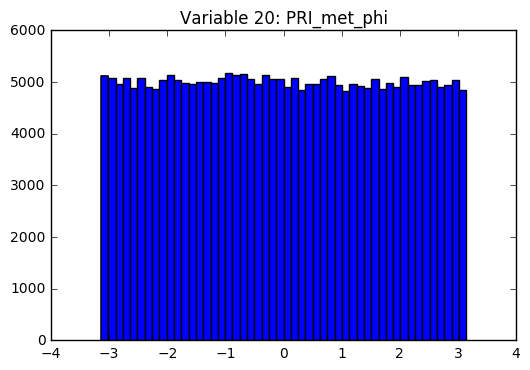

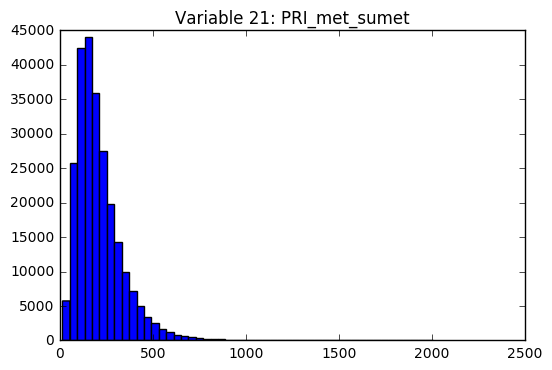

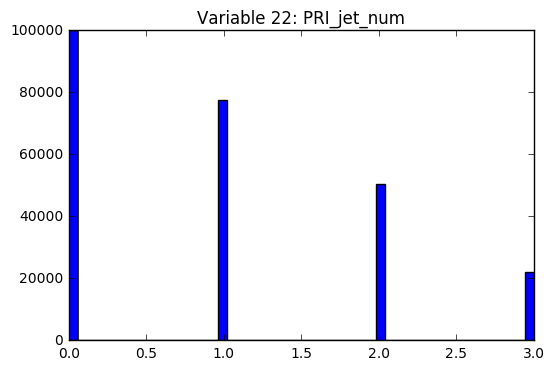

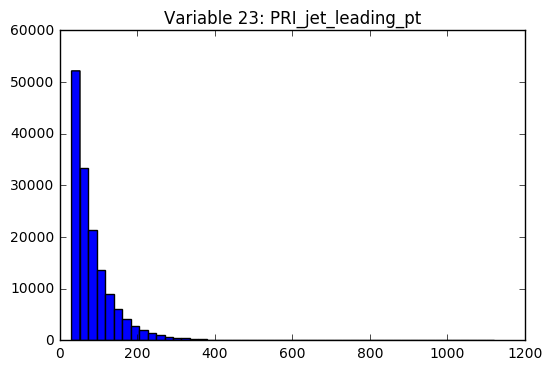

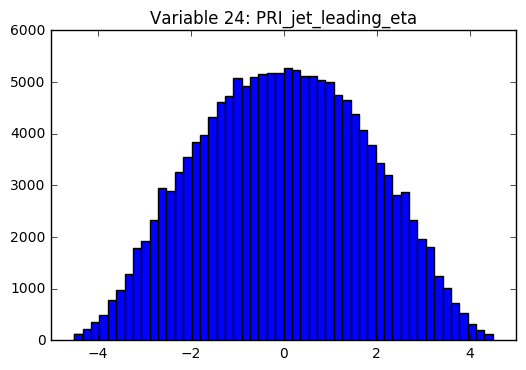

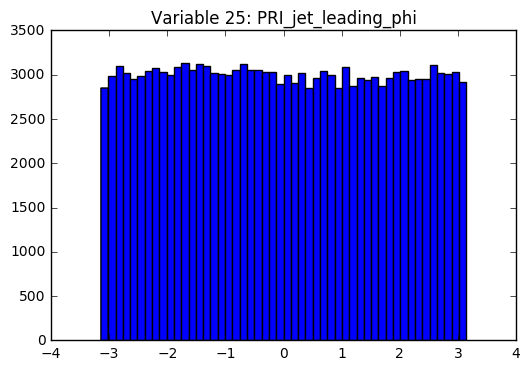

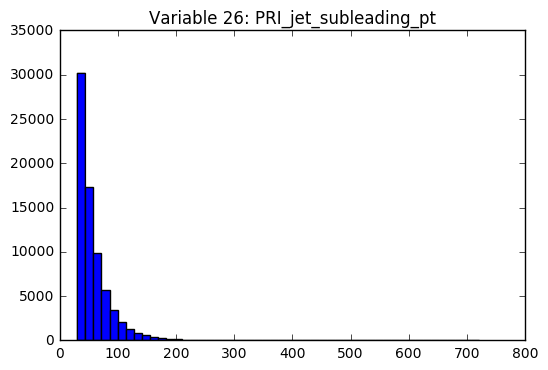

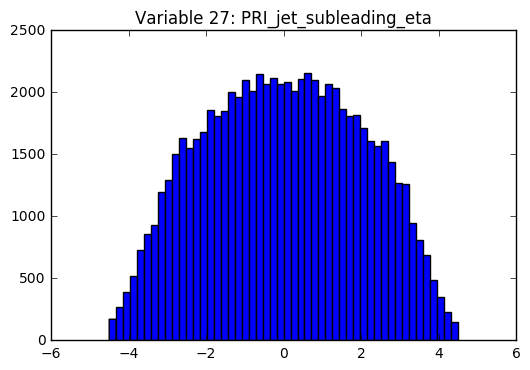

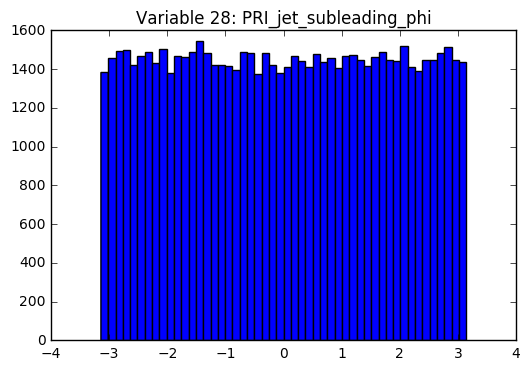

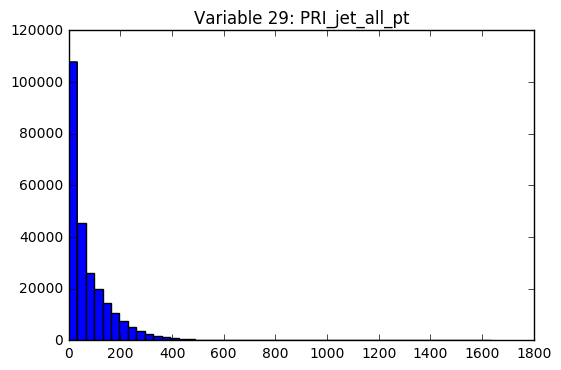

In [3]:
nbr_param = len(tX[0])
print("Number of variables: %i"%(nbr_param))

# Plot the histograms
for i in range(len(tX[0])):
    array = tX[:,i]
    n, bins, patches = plt.hist(array[array != -999], 50)
    plt.title("Variable %i: %s"%(i, headers[i+2]))
    plt.show()

We have a lot of interesting histograms. We can see different kind of distributions. But one of the most interesting histogram is the one with `PRI_jet_num`. Indeed, we have only four values available and this can be explained easily. When particles collide (especially heavy ion or quark or gluon), they can create a cone of hadrons (or other particles) called **jet**. We also see that the next histograms are about angles. But if we have 0 or 1 jet, then we won't have any angle. So, let's check the percentage of data with jet equals to 0 or to 1.

In [4]:
nbr_jets = tX[:,22]
perc_zero_one_jet = (len(nbr_jets[nbr_jets == 0]) + 
                     len(nbr_jets[nbr_jets == 1])) / len(nbr_jets)
print("Percentage of 0 or 1 jet: %f"%perc_zero_one_jet)

Percentage of 0 or 1 jet: 0.709828


And now we see a really interesting result. In the notebook `Cleaning_and_Analysis_Simple`, we saw that some columns has around 70% of missing values. These missing values then correspond to the 0 or 1 jet. So, let's cut the matrix of parameters into four matrices, one for each jet.

In [5]:
tX_jet_0 = tX[tX[:,22] == 0]
tX_jet_1 = tX[tX[:,22] == 1]
tX_jet_2 = tX[tX[:,22] == 2]
tX_jet_3 = tX[tX[:,22] == 3]

# Remove the column 22 with only 1 value
tX_jet_0 = np.delete(tX_jet_0, 22, 1)
tX_jet_1 = np.delete(tX_jet_1, 22, 1)
tX_jet_2 = np.delete(tX_jet_2, 22, 1)
tX_jet_3 = np.delete(tX_jet_3, 22, 1)

# Remove column in header
headers_jet_0 = np.delete(headers, 24)
headers_jet_1 = np.delete(headers, 24)
headers_jet_2 = np.delete(headers, 24)
headers_jet_3 = np.delete(headers, 24)

Now, we can check which column contains NaN and which columns contains **only** NaN for each jet.

In [6]:
nan_jet_0 = np.ones(len(tX_jet_0[0]), dtype=bool)
header_nan_jet_0 = np.ones(len(tX_jet_0[0])+2, dtype=bool)
print('jet_0 (Perc NaN): ')
for i in range(len(tX_jet_0[0])):
    array = tX_jet_0[:,i]
    nbr_NaN = len(array[array == -999])
    if (nbr_NaN == len(array)):
        nan_jet_0[i] = False
        header_nan_jet_0[i+2] = False
    if(nbr_NaN > 0):
        print('  %i (%i%%) <- %s'%(nbr_NaN, 100*nbr_NaN/len(array), 
                                   headers_jet_0[i+2]))
        
nan_jet_1 = np.ones(len(tX_jet_1[0]), dtype=bool)
header_nan_jet_1 = np.ones(len(tX_jet_0[0])+2, dtype=bool)
print('jet_1 (Perc NaN): ')
for i in range(len(tX_jet_1[0])):
    array = tX_jet_1[:,i]
    nbr_NaN = len(array[array == -999])
    if (nbr_NaN == len(array)):
        nan_jet_1[i] = False 
        header_nan_jet_1[i+2] = False        
    if(nbr_NaN > 0):
        print('  %i (%i%%) <- %s'%(nbr_NaN, 100*nbr_NaN/len(array), 
                                   headers_jet_1[i+2])) 
        
print('jet_2 (Perc NaN): ')
for i in range(len(tX_jet_2[0])):
    array = tX_jet_2[:,i]
    nbr_NaN = len(array[array == -999])
    if(nbr_NaN > 0):
        print('  %i (%i%%) <- %s'%(nbr_NaN, 100*nbr_NaN/len(array), 
                                   headers_jet_2[i+2])) 
        
print('jet_3 (Perc NaN): ')
for i in range(len(tX_jet_3[0])):
    array = tX_jet_3[:,i]
    nbr_NaN = len(array[array == -999])
    if(nbr_NaN > 0):
        print('  %i (%i%%) <- %s'%(nbr_NaN, 100*nbr_NaN/len(array), 
                                   headers_jet_3[i+2])) 
    

jet_0 (Perc NaN): 
  26123 (26%) <- DER_mass_MMC
  99913 (100%) <- DER_deltaeta_jet_jet
  99913 (100%) <- DER_mass_jet_jet
  99913 (100%) <- DER_prodeta_jet_jet
  99913 (100%) <- DER_lep_eta_centrality
  99913 (100%) <- PRI_jet_leading_pt
  99913 (100%) <- PRI_jet_leading_eta
  99913 (100%) <- PRI_jet_leading_phi
  99913 (100%) <- PRI_jet_subleading_pt
  99913 (100%) <- PRI_jet_subleading_eta
  99913 (100%) <- PRI_jet_subleading_phi
jet_1 (Perc NaN): 
  7562 (9%) <- DER_mass_MMC
  77544 (100%) <- DER_deltaeta_jet_jet
  77544 (100%) <- DER_mass_jet_jet
  77544 (100%) <- DER_prodeta_jet_jet
  77544 (100%) <- DER_lep_eta_centrality
  77544 (100%) <- PRI_jet_subleading_pt
  77544 (100%) <- PRI_jet_subleading_eta
  77544 (100%) <- PRI_jet_subleading_phi
jet_2 (Perc NaN): 
  2952 (5%) <- DER_mass_MMC
jet_3 (Perc NaN): 
  1477 (6%) <- DER_mass_MMC


This result is really interesting (again). If we go check the parameters with missing values in the `Cleaning_and_Analysis_Simple` notebook, we can have a look at the missing values for each kind of jets produced. 

**Missing for all jets**
- DER_mass_MMC (~15%): We can find these missing values for each jet. So, we can imagine that the mass can be sometimes difficult to find due to experimental problems.

**Missing for jet 0**
- PRI_jet_leading_pt: `pt` corresponds to the *momentum that is perpendicular to the beamline of a particle detector*. So, it's logic that it's missing if no beam is created
- PRI_jet_leading_eta: $\eta$ corresponds to the pseudorapidity. So, it's normal it's missing when there's no beam created.
- PRI_jet_leading_phi: $\phi$ corresponds also to the pseudorapidity.

**Missing for jet 0 and 1**
The following parameters have something to do between two (or more) jets. Therefore it is normal that they are null when we only have zero or one jet.
- DER_deltaeta_jet_jet
- DER_mass_jet_jet
- DER_prodeta_jet_jet
- DER_lep_eta_centrality
- PRI_jet_subleading_pt
- PRI_jet_subleading_eta
- PRI_jet_subleading_phi

### Conclusion

If we split our data set into four data sets, we can remove a lot of NaNs. We won't remove the NaNs due to the DER_mass_MMC because we won't have enough data.

## Checking if we can remove more columns

To do this, we need the histogram again but this time, we will plot them by the four differents models (using different colors)

In [7]:
# Cut the predictions
y_jet_0 = y[tX[:,22] == 0]
y_jet_1 = y[tX[:,22] == 1]
y_jet_2 = y[tX[:,22] == 2]
y_jet_3 = y[tX[:,22] == 3]

# Cut the labels
ids_jet_0 = ids[tX[:,22] == 0]
ids_jet_1 = ids[tX[:,22] == 1]
ids_jet_2 = ids[tX[:,22] == 2]
ids_jet_3 = ids[tX[:,22] == 3]

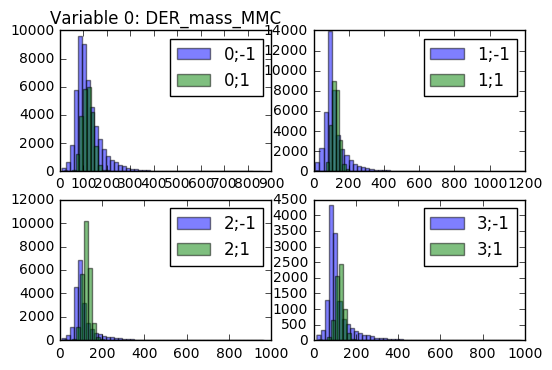

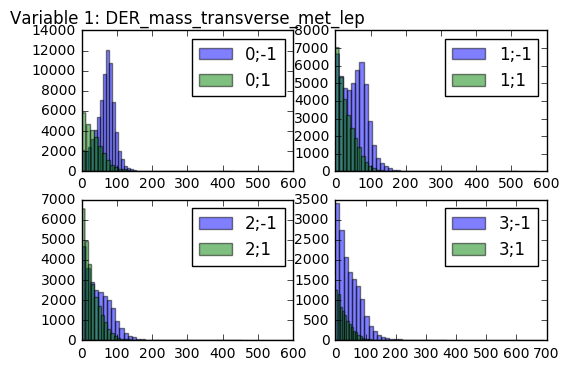

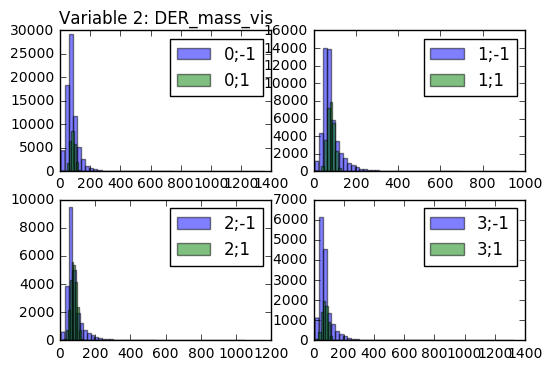

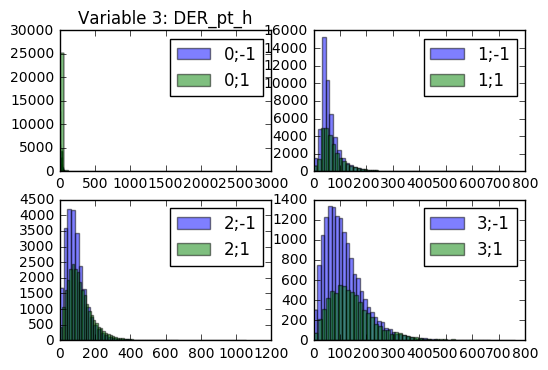

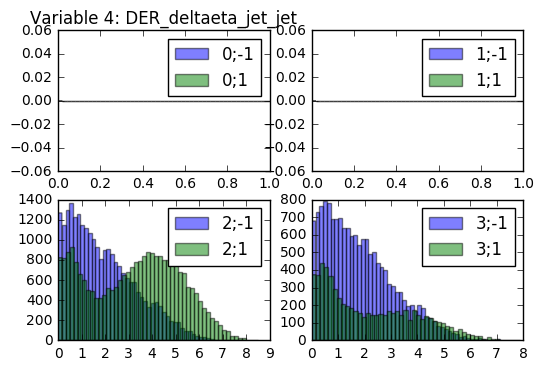

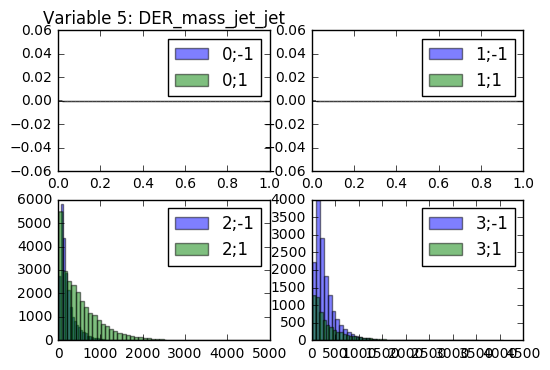

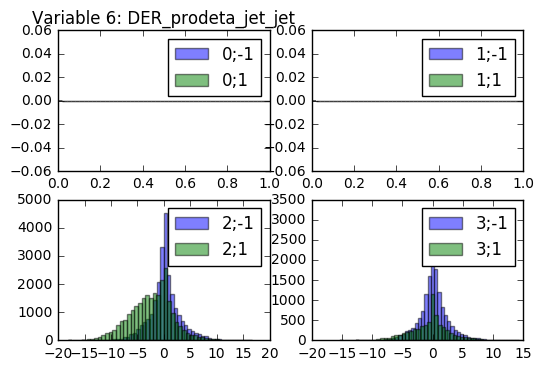

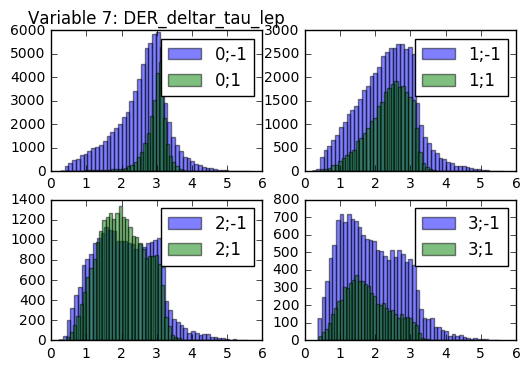

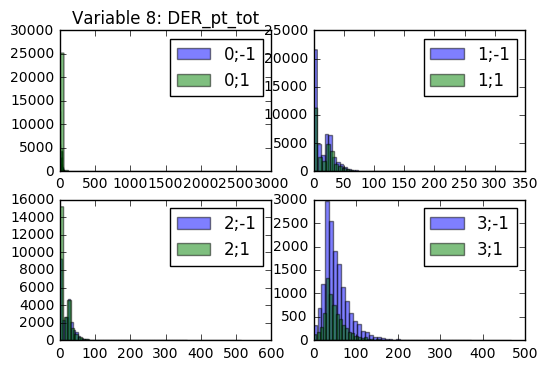

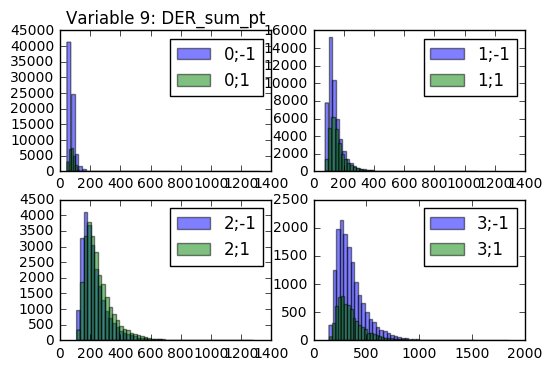

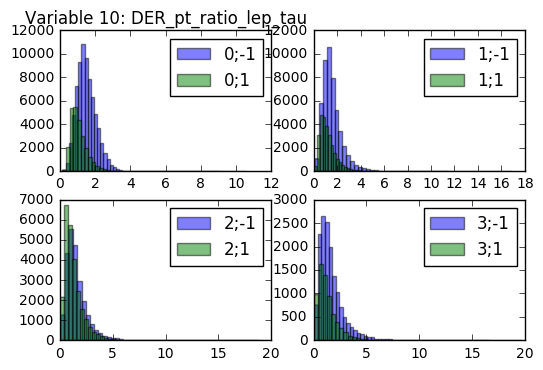

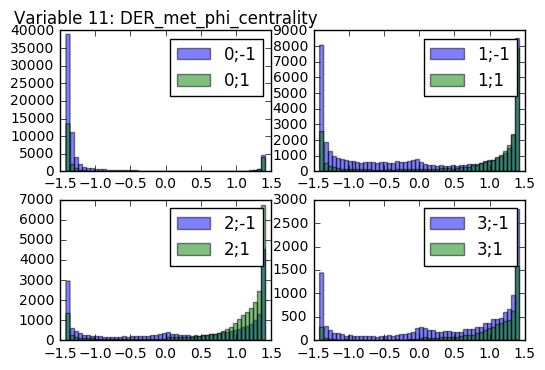

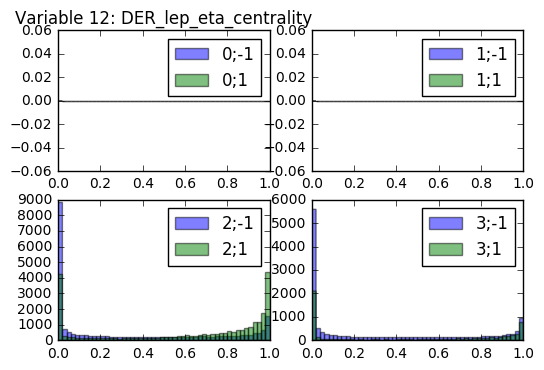

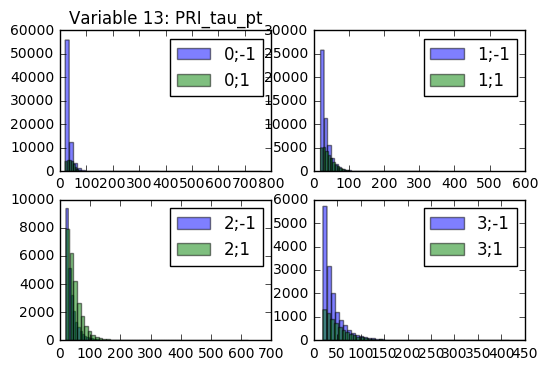

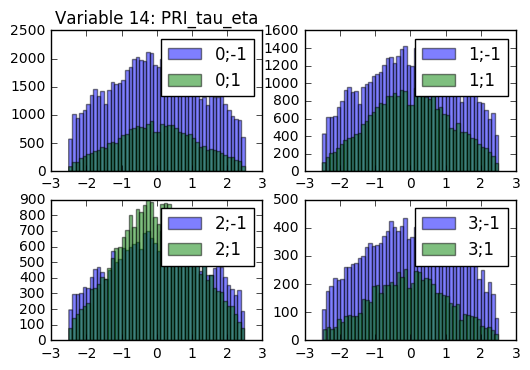

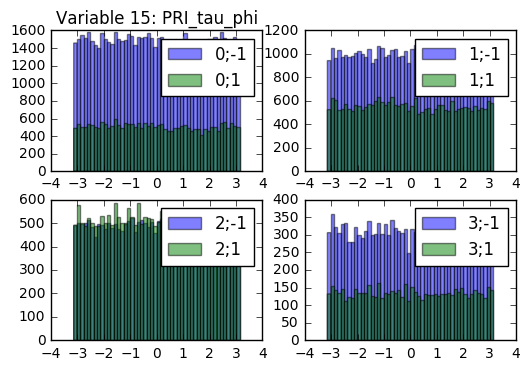

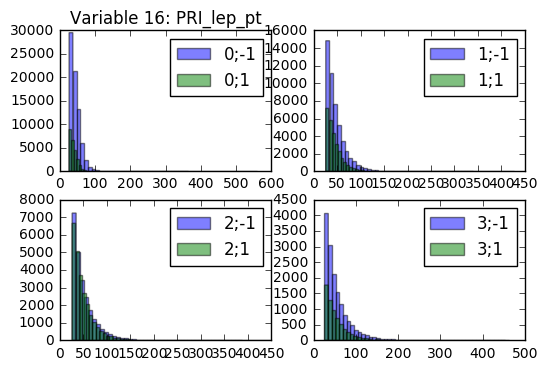

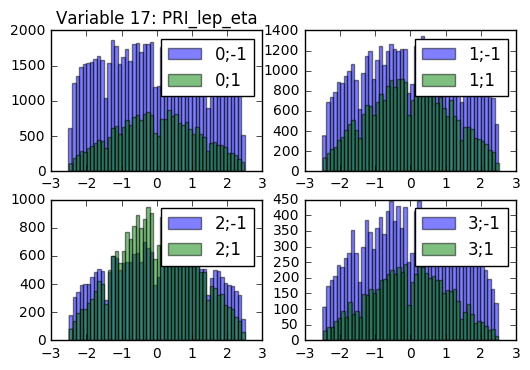

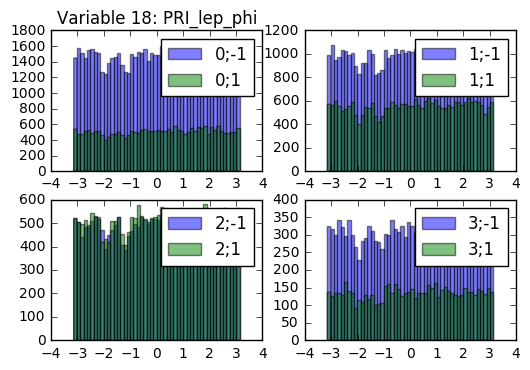

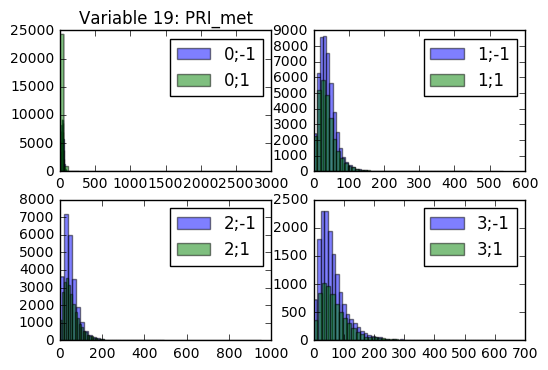

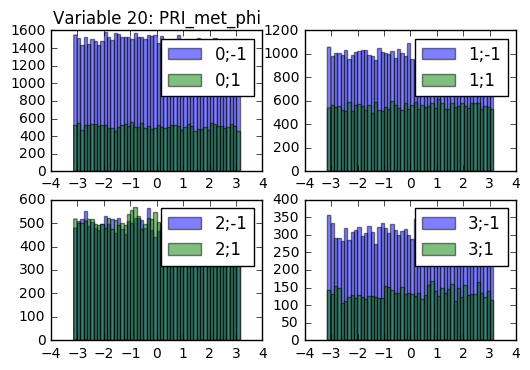

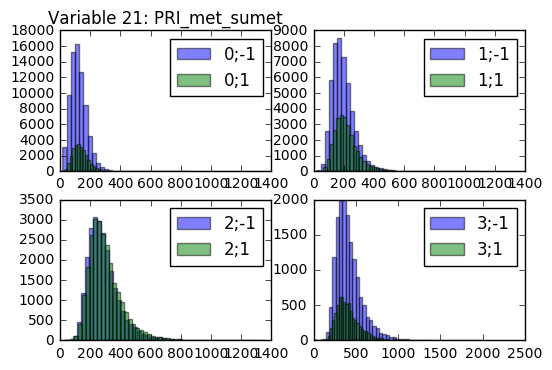

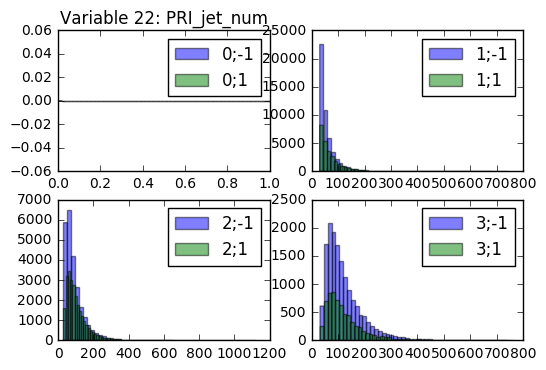

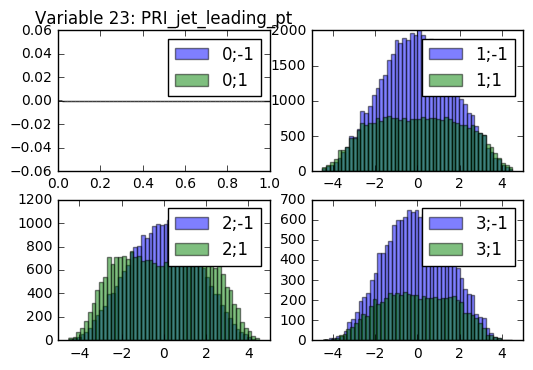

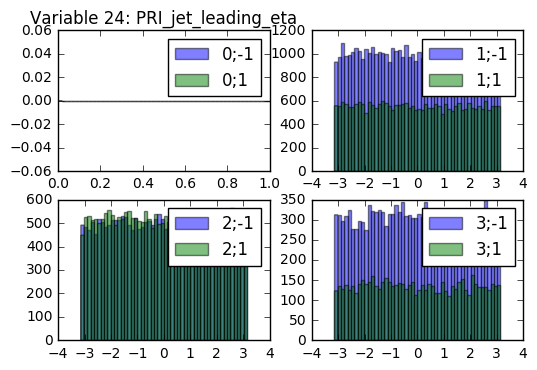

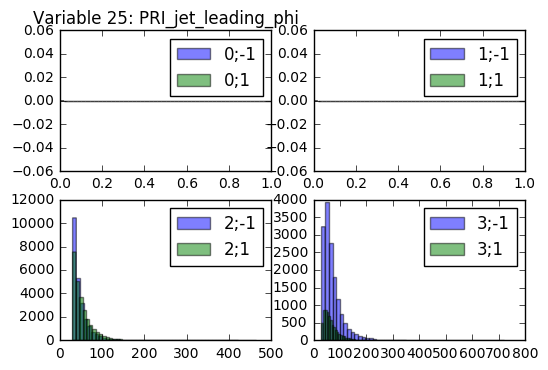

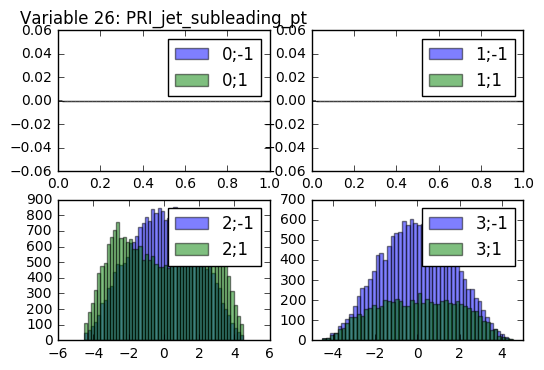

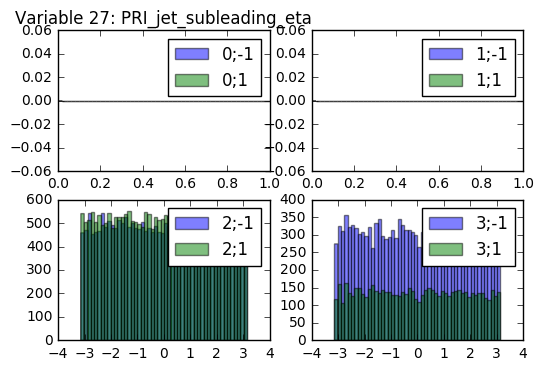

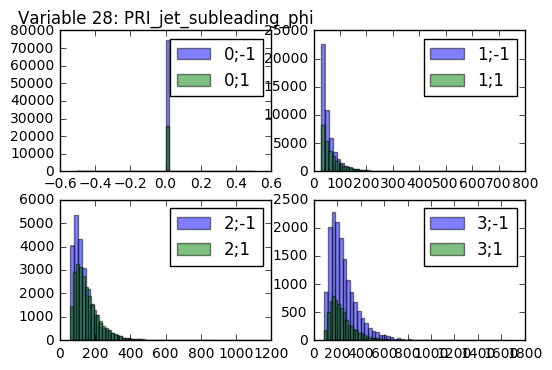

In [8]:
# Plot the histograms (-1 is background, 1 is boson)
for i in range(len(tX[0])-1):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
    array = tX_jet_0[:,i]
    back = array[y_jet_0 == -1]
    boson = array[y_jet_0 == 1]
    ax1.hist(back[back != -999], 50, alpha=0.5, label='0;-1')
    ax1.hist(boson[boson != -999], 50, alpha=0.5, label='0;1')
    ax1.legend(loc='upper right')
                                
    array = tX_jet_1[:,i]
    back = array[y_jet_1 == -1]
    boson = array[y_jet_1 == 1]
    ax2.hist(back[back != -999], 50, alpha=0.5, label='1;-1')
    ax2.hist(boson[boson != -999], 50, alpha=0.5, label='1;1')
    ax2.legend(loc='upper right')
    
    array = tX_jet_2[:,i]
    back = array[y_jet_2 == -1]
    boson = array[y_jet_2 == 1]
    ax3.hist(back[back != -999], 50, alpha=0.5, label='2;-1')
    ax3.hist(boson[boson != -999], 50, alpha=0.5, label='2;1')
    ax3.legend(loc='upper right')
    
    array = tX_jet_3[:,i]
    back = array[y_jet_3 == -1]
    boson = array[y_jet_3 == 1]
    ax4.hist(back[back != -999], 50, alpha=0.5, label='3;-1')
    ax4.hist(boson[boson != -999], 50, alpha=0.5, label='3;1') 
    ax4.legend(loc='upper right')
    
    ax1.set_title("Variable %i: %s"%(i, headers[i+2]))
    plt.show()

We can see in the hist that:
- Variable 1 has a different distribution between background and boson for jet 0 and jet 1
- Variable 3 can be removed for jet 0 (outlier to be checked)
- Variable 4 has a different distribution between background and boson for jet 2
- Variable 7 has a different distribution between background and boson for jet 0
- Variable 8 can be removed for jet 0 (outlier to be checked)
- Variable 19 can be removed for jet 0 (outlier to be checked)
- Variable 28 can be definitely removed for jet 0.

### Remove outliers for jet 0


In [9]:
# Variable 0
print(tX_jet_0[tX_jet_0[:,0] > 500][:,0]) 
print(ids_jet_0[tX_jet_0[:,0] > 500])
# Don't remove anything here

[ 598.835  666.847  619.756  512.661  576.906  549.075  736.493  517.609
  588.003  594.885  644.961  511.92   503.762  634.973  514.094  538.683
  515.768  544.231  526.254  580.376  676.922  780.999  540.226  863.647
  585.706  576.22   509.118  760.613  566.312  710.221  545.529  563.148
  515.515  531.241  630.519  532.927  701.13   540.773  506.707  761.406
  754.009  787.614  684.819  820.122  721.81   732.453  820.052  728.231
  523.114  562.398  540.395  542.313  506.851  674.597  521.58   562.268
  503.624  508.938  668.83   575.012  531.22   651.064  656.827  636.938
  535.484  659.568  596.693  524.815  579.026  539.563  808.817  606.771
  625.895  501.554]
[102335 102588 110522 113167 114002 117779 118128 119023 121898 131229
 135983 136129 142109 145067 151932 152831 152856 158541 161936 166217
 167109 172821 177683 178992 179120 179244 183018 183600 184377 189480
 191848 193596 196573 211093 213984 217740 231230 242051 243513 246775
 248015 250286 250862 253537 260569 263

In [10]:
# Variable 1
print(tX_jet_0[tX_jet_0[:,1] > 300][:,1]) 
print(ids_jet_0[tX_jet_0[:,1] > 300])
# Don't remove anything here

[ 444.719  302.584  399.981  341.056  335.502  333.647  415.853  365.281
  381.4    309.949  348.46   317.696  337.39   428.951  417.002  339.394
  570.115  363.636  555.798  401.901  308.771  300.656  307.944  362.696
  425.722  302.411  337.869  322.371  345.553  343.767  405.085  309.757
  351.214  395.873]
[107343 118127 131768 139194 144621 155059 171276 172509 174877 178953
 206999 208997 219763 223643 235840 242284 249289 261604 261941 268751
 270881 274209 276516 290491 308242 313366 315821 317737 321502 326256
 332832 340114 344064 346777]


In [11]:
# Variable 2
print(tX_jet_0[tX_jet_0[:,2] > 600][:,2]) 
print(ids_jet_0[tX_jet_0[:,2] > 600])
# Don't remove anything here

[  651.561   674.553   752.105   675.649  1349.351   617.943]
[108073 133951 156228 266451 302795 340096]


In [12]:
# Variable 3
print(tX_jet_0[tX_jet_0[:,3] > 200][:,3]) 
print(ids_jet_0[tX_jet_0[:,3] > 200])
# We can remove this variable
to_remove = (tX_jet_0[:,3] < 200)

[ 2834.999]
[107343]


In [13]:
# Variable 8
print(tX_jet_0[tX_jet_0[:,8] > 200][:,8])
print(ids_jet_0[tX_jet_0[:,8] > 200])
# Same variable to remove

[ 2834.999]
[107343]


In [14]:
# Variable 8
print(tX_jet_0[tX_jet_0[:,9] > 500][:,9])
print(ids_jet_0[tX_jet_0[:,9] > 500])
# Don't remove anything here

[  737.967   522.165  1324.678]
[156228 268802 302795]


In [15]:
# Variable 19
print(tX_jet_0[tX_jet_0[:,19] > 300][:,19])
print(ids_jet_0[tX_jet_0[:,19] > 300])

[ 2842.617   307.846]
[107343 261604]


We will only remove the id 107343 of the jet 0. For the other, we don't have such outlier.

## Creation of the first four models for the train data

(Re)Create all the data for each jet

In [16]:
# Jet 0
tX_jet_0 = tX[tX[:,22] == 0]
tX_jet_0 = np.delete(tX_jet_0, 22, 1)
y_jet_0 = y[tX[:,22] == 0]
ids_jet_0 = ids[tX[:,22] == 0]

# Remove the outlier variable
tX_jet_0 = tX_jet_0[to_remove, :]
y_jet_0 = y_jet_0[to_remove]
ids_jet_0 = ids_jet_0[to_remove]

headers_jet_0 = np.delete(headers, 24)
## We can remove the last column of jet 0 because it's only 0
print("Percentage of 0 in last column: %i"%(100*len(tX_jet_0[tX_jet_0[:,-1] == 0])/len(tX_jet_0)))
nan_jet_0[-1] = False
header_nan_jet_0[-1] = False

# Jet 1
tX_jet_1 = tX[tX[:,22] == 1]
tX_jet_1 = np.delete(tX_jet_1, 22, 1)
y_jet_1 = y[tX[:,22] == 1]
ids_jet_1 = ids[tX[:,22] == 1]
headers_jet_1 = np.delete(headers, 24)

# Jet 2
tX_jet_2 = tX[tX[:,22] == 2]
tX_jet_2 = np.delete(tX_jet_2, 22, 1)
y_jet_2 = y[tX[:,22] == 2]
ids_jet_2 = ids[tX[:,22] == 2]
headers_jet_2 = np.delete(headers, 24)

# Jet 3
tX_jet_3 = tX[tX[:,22] == 3]
tX_jet_3 = np.delete(tX_jet_3, 22, 1)
y_jet_3 = y[tX[:,22] == 3]
ids_jet_3 = ids[tX[:,22] == 3]
headers_jet_3 = np.delete(headers, 24)

Percentage of 0 in last column: 100


Remove the columns in data for jet 0 and jet 1

In [17]:
headers_jet_0 = headers_jet_0[header_nan_jet_0]
tX_jet_0 = tX_jet_0[:,nan_jet_0]

headers_jet_1 = headers_jet_1[header_nan_jet_1]
tX_jet_1 = tX_jet_1[:,nan_jet_1]

Write the files

In [18]:
write_data('data/train_jet_0.csv', y_jet_0, tX_jet_0, ids_jet_0, headers_jet_0, 'train')
write_data('data/train_jet_1.csv', y_jet_1, tX_jet_1, ids_jet_1, headers_jet_1, 'train')
write_data('data/train_jet_2.csv', y_jet_2, tX_jet_2, ids_jet_2, headers_jet_2, 'train')
write_data('data/train_jet_3.csv', y_jet_3, tX_jet_3, ids_jet_3, headers_jet_3, 'train')

## Creation of the first four models for the test data


In [19]:
DATA_TEST_PATH = 'data/test.csv' 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

Create all the data for each jet

In [20]:
# Jet 0
tX_jet_0_test = tX_test[tX_test[:,22] == 0]
tX_jet_0_test = np.delete(tX_jet_0_test, 22, 1)
ids_jet_0_test = ids_test[tX_test[:,22] == 0]

# Jet 1
tX_jet_1_test = tX_test[tX_test[:,22] == 1]
tX_jet_1_test = np.delete(tX_jet_1_test, 22, 1)
ids_jet_1_test = ids_test[tX_test[:,22] == 1]

# Jet 2
tX_jet_2_test = tX_test[tX_test[:,22] == 2]
tX_jet_2_test = np.delete(tX_jet_2_test, 22, 1)
ids_jet_2_test = ids_test[tX_test[:,22] == 2]

# Jet 3
tX_jet_3_test = tX_test[tX_test[:,22] == 3]
tX_jet_3_test = np.delete(tX_jet_3_test, 22, 1)
ids_jet_3_test = ids_test[tX_test[:,22] == 3]


Remove the columns in data for jet 0 and jet 1

In [21]:
tX_jet_0_test = tX_jet_0_test[:,nan_jet_0]

tX_jet_1_test = tX_jet_1_test[:,nan_jet_1]

Write the files

In [22]:
write_data('data/test_jet_0.csv', _, tX_jet_0_test, ids_jet_0_test, headers_jet_0, 'test')
write_data('data/test_jet_1.csv', _, tX_jet_1_test, ids_jet_1_test, headers_jet_1, 'test')
write_data('data/test_jet_2.csv', _, tX_jet_2_test, ids_jet_2_test, headers_jet_2, 'test')
write_data('data/test_jet_3.csv', _, tX_jet_3_test, ids_jet_3_test, headers_jet_3, 'test')

## Change the data a bit

In here, we want to change the data such that:

1. The sets with flat distribution are removed

In [23]:
DATA_TRAIN_PATH = 'data/train.csv' 
_, _, _, headers = load_data(DATA_TRAIN_PATH)
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

In [24]:
idx_to_remove = [15, 18, 20, 25, 28]

In [25]:
tX = np.delete(tX, idx_to_remove,axis=1)
headers = np.delete(headers, idx_to_remove)

In [26]:
print(tX[:,19])

[ 2.  1.  1. ...,  1.  0.  0.]


In [27]:
tX_jet_0 = tX[tX[:,19] == 0]
tX_jet_1 = tX[tX[:,19] == 1]
tX_jet_2 = tX[tX[:,19] == 2]
tX_jet_3 = tX[tX[:,19] == 3]

# Remove the column 22 with only 1 value
tX_jet_0 = np.delete(tX_jet_0, 19, 1)
tX_jet_1 = np.delete(tX_jet_1, 19, 1)
tX_jet_2 = np.delete(tX_jet_2, 19, 1)
tX_jet_3 = np.delete(tX_jet_3, 19, 1)

# Cut the predictions
y_jet_0 = y[tX[:,19] == 0]
y_jet_1 = y[tX[:,19] == 1]
y_jet_2 = y[tX[:,19] == 2]
y_jet_3 = y[tX[:,19] == 3]

# Cut the labels
ids_jet_0 = ids[tX[:,19] == 0]
ids_jet_1 = ids[tX[:,19] == 1]
ids_jet_2 = ids[tX[:,19] == 2]
ids_jet_3 = ids[tX[:,19] == 3]

# Remove column in header
headers_jet_0 = np.delete(headers, 21)
headers_jet_1 = np.delete(headers, 21)
headers_jet_2 = np.delete(headers, 21)
headers_jet_3 = np.delete(headers, 21)

In [28]:
print(len(tX_jet_0) + len(tX_jet_1) + len(tX_jet_2) + len (tX_jet_3))

250000


In [29]:
nan_jet_0 = np.ones(len(tX_jet_0[0]), dtype=bool)
header_nan_jet_0 = np.ones(len(tX_jet_0[0])+2, dtype=bool)
print('jet_0 (Perc NaN): ')
for i in range(len(tX_jet_0[0])):
    array = tX_jet_0[:,i]
    nbr_NaN = len(array[array == -999])
    if (nbr_NaN == len(array)):
        nan_jet_0[i] = False
        header_nan_jet_0[i+2] = False
    if(nbr_NaN > 0):
        print('  %i (%i%%) <- %s'%(nbr_NaN, 100*nbr_NaN/len(array), 
                                   headers_jet_0[i+2]))
        
nan_jet_1 = np.ones(len(tX_jet_1[0]), dtype=bool)
header_nan_jet_1 = np.ones(len(tX_jet_1[0])+2, dtype=bool)
print('jet_1 (Perc NaN): ')
for i in range(len(tX_jet_1[0])):
    array = tX_jet_1[:,i]
    nbr_NaN = len(array[array == -999])
    if (nbr_NaN == len(array)):
        nan_jet_1[i] = False 
        header_nan_jet_1[i+2] = False        
    if(nbr_NaN > 0):
        print('  %i (%i%%) <- %s'%(nbr_NaN, 100*nbr_NaN/len(array), 
                                   headers_jet_1[i+2])) 
        
print('jet_2 (Perc NaN): ')
for i in range(len(tX_jet_2[0])):
    array = tX_jet_2[:,i]
    nbr_NaN = len(array[array == -999])
    if(nbr_NaN > 0):
        print('  %i (%i%%) <- %s'%(nbr_NaN, 100*nbr_NaN/len(array), 
                                   headers_jet_2[i+2])) 
        
print('jet_3 (Perc NaN): ')
for i in range(len(tX_jet_3[0])):
    array = tX_jet_3[:,i]
    nbr_NaN = len(array[array == -999])
    if(nbr_NaN > 0):
        print('  %i (%i%%) <- %s'%(nbr_NaN, 100*nbr_NaN/len(array), 
                                   headers_jet_3[i+2])) 
    

jet_0 (Perc NaN): 
  26123 (26%) <- DER_mass_MMC
  99913 (100%) <- DER_deltaeta_jet_jet
  99913 (100%) <- DER_mass_jet_jet
  99913 (100%) <- DER_prodeta_jet_jet
  99913 (100%) <- DER_lep_eta_centrality
  99913 (100%) <- PRI_jet_leading_eta
  99913 (100%) <- PRI_jet_leading_phi
  99913 (100%) <- PRI_jet_subleading_eta
  99913 (100%) <- PRI_jet_subleading_phi
jet_1 (Perc NaN): 
  7562 (9%) <- DER_mass_MMC
  77544 (100%) <- DER_deltaeta_jet_jet
  77544 (100%) <- DER_mass_jet_jet
  77544 (100%) <- DER_prodeta_jet_jet
  77544 (100%) <- DER_lep_eta_centrality
  77544 (100%) <- PRI_jet_subleading_eta
  77544 (100%) <- PRI_jet_subleading_phi
jet_2 (Perc NaN): 
  2952 (5%) <- DER_mass_MMC
jet_3 (Perc NaN): 
  1477 (6%) <- DER_mass_MMC


In [30]:
to_remove = (tX_jet_0[:,3] < 200)
# Remove the outlier variable
tX_jet_0 = tX_jet_0[to_remove, :]
y_jet_0 = y_jet_0[to_remove]
ids_jet_0 = ids_jet_0[to_remove]

headers_jet_0 = np.delete(headers, 24)
## We can remove the last column of jet 0 because it's only 0
print("Percentage of 0 in last column: %i"%(100*len(tX_jet_0[tX_jet_0[:,-1] == 0])/len(tX_jet_0)))
nan_jet_0[-1] = False
header_nan_jet_0[-1] = False

[[ 143.905   81.417   80.943 ..., -999.    -999.       0.   ]
 [ 175.864   16.915  134.805 ..., -999.    -999.       0.   ]
 [ 105.594   50.559  100.989 ..., -999.    -999.       0.   ]
 ..., 
 [-999.      58.179   68.083 ..., -999.    -999.       0.   ]
 [  94.951   19.362   68.812 ..., -999.    -999.       0.   ]
 [-999.      72.756   70.831 ..., -999.    -999.       0.   ]]
Percentage of 0 in last column: 100


In [31]:
headers_jet_0 = headers_jet_0[header_nan_jet_0]
tX_jet_0 = tX_jet_0[:,nan_jet_0]

headers_jet_1 = headers_jet_1[header_nan_jet_1]
tX_jet_1 = tX_jet_1[:,nan_jet_1]

In [33]:
write_data('data/train_jet_0_cv.csv', y_jet_0, tX_jet_0, ids_jet_0, headers_jet_0, 'train')
write_data('data/train_jet_1_cv.csv', y_jet_1, tX_jet_1, ids_jet_1, headers_jet_1, 'train')
write_data('data/train_jet_2_cv.csv', y_jet_2, tX_jet_2, ids_jet_2, headers_jet_2, 'train')
write_data('data/train_jet_3_cv.csv', y_jet_3, tX_jet_3, ids_jet_3, headers_jet_3, 'train')

## Creation of the models for the test data


In [34]:
DATA_TEST_PATH = 'data/test.csv' 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

Create all the data for each jet

In [35]:
tX_test = np.delete(tX_test, idx_to_remove,axis=1)

In [36]:
# Jet 0
tX_jet_0_test = tX_test[tX_test[:,19] == 0]
tX_jet_0_test = np.delete(tX_jet_0_test, 19, 1)
ids_jet_0_test = ids_test[tX_test[:,19] == 0]

# Jet 1
tX_jet_1_test = tX_test[tX_test[:,19] == 1]
tX_jet_1_test = np.delete(tX_jet_1_test, 19, 1)
ids_jet_1_test = ids_test[tX_test[:,19] == 1]

# Jet 2
tX_jet_2_test = tX_test[tX_test[:,19] == 2]
tX_jet_2_test = np.delete(tX_jet_2_test, 19, 1)
ids_jet_2_test = ids_test[tX_test[:,19] == 2]

# Jet 3
tX_jet_3_test = tX_test[tX_test[:,19] == 3]
tX_jet_3_test = np.delete(tX_jet_3_test, 19, 1)
ids_jet_3_test = ids_test[tX_test[:,19] == 3]


Remove the columns in data for jet 0 and jet 1

In [37]:
tX_jet_0_test = tX_jet_0_test[:,nan_jet_0]

tX_jet_1_test = tX_jet_1_test[:,nan_jet_1]

Write the files

In [38]:
write_data('data/test_jet_0_cv.csv', _, tX_jet_0_test, ids_jet_0_test, headers_jet_0, 'test')
write_data('data/test_jet_1_cv.csv', _, tX_jet_1_test, ids_jet_1_test, headers_jet_1, 'test')
write_data('data/test_jet_2_cv.csv', _, tX_jet_2_test, ids_jet_2_test, headers_jet_2, 'test')
write_data('data/test_jet_3_cv.csv', _, tX_jet_3_test, ids_jet_3_test, headers_jet_3, 'test')